<div style="font-size: 14pt;">Prof. Krzysztof Rybinski</div><br/><br/>
<div style="font-size: 22pt;"><b>Artificial Intelligence course</b></div><br/><br/>
<div style="font-size: 18pt;">Homework 4 </div><br/>
<div style="font-size: 18pt;">- Train convolutional neural network on lfw people dataset</div><br/>
<div style="font-size: 18pt;">- Try different hyperparameters (no of layers, no of neurons, number of filters, filter size etc.)</div><br/>
<div style="font-size: 18pt;">- Use dropout regularization after Maxpooling and/or after Dense layer and check if it helps</div><br/>
<div style="font-size: 18pt;">- Use callback - early stopping </div><br/><br/>
<div style="font-size: 18pt;">- Max 2 points. Best accuracy gets 0.2 point bonus</div><br/>


In [4]:
import keras
from keras.callbacks import ModelCheckpoint
import numpy as np
from matplotlib import pyplot as plt
import os

In [5]:
# Download dataset
from sklearn import datasets
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape
print(n_samples, h, w)

760 50 37


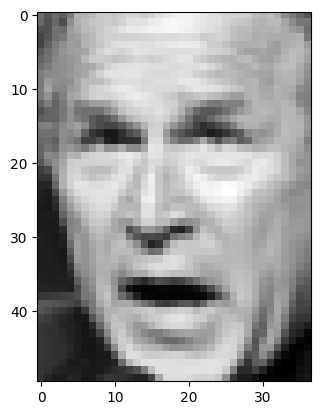

1 George W Bush


In [6]:
plt.imshow( lfw_people.images[6] , cmap='gray')
plt.show()
print( lfw_people.target[6] , lfw_people.target_names[lfw_people.target[6]] )

In [7]:
X = lfw_people.data
y = lfw_people.target

n_features = X.shape[1]
target_names = lfw_people.target_names

In [75]:
y = keras.utils.to_categorical(y,)
y

array([[[[0., 1.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[1., 0.],
         [0., 1.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 1.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]]],


       [[[0., 1.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[1., 0.],
         [0., 1.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 1.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]]],


       [[[1., 0.],
         [0., 1.],
         [1., 0.],
         ...,
         [1., 0.],
         [1., 0.],
         [1., 0.]],

        [[0., 1.],
         [1., 0.],
         [1., 0.],
         ...,
         [1., 0

In [76]:
n_classes = y.shape[1]

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1234)
X_train = X_train / 255
X_test = X_test / 255
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((570, 1850), (190, 1850), (570, 3, 7, 2), (190, 3, 7, 2))

In [78]:
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Reshape
from keras.models import Sequential


In [79]:
#Use callbacks
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(patience=10, monitor="val_loss", verbose=1)


In [86]:
#define the model, do not forget to reshape the input
model = Sequential()
model.add(Reshape((50,37,1), input_shape=(1850,)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax')) # update number of neurons to 7



In [87]:
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_11 (Reshape)        (None, 50, 37, 1)         0         
                                                                 
 conv2d_22 (Conv2D)          (None, 48, 35, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 24, 17, 32)       0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 24, 17, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 22, 15, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 11, 7, 64)        0         
 g2D)                                                

In [88]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [83]:
#train the model, use callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [89]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])

Epoch 1/50


ValueError: in user code:

    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 3, 7, 2) and (None, 7) are incompatible


In [69]:
#evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

ValueError: in user code:

    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\engine\training.py", line 1820, in test_function  *
        return step_function(self, iterator)
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\engine\training.py", line 1804, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\engine\training.py", line 1792, in run_step  **
        outputs = model.test_step(data)
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\engine\training.py", line 1758, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\admin\Desktop\AI_course_2023\.env\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 3, 7) and (None, 7) are incompatible


In [ ]:
#Add more convolutional/maxpooling layers
#Experiment with the number of neurons, filer size, number of filters etc.
#Add dropout layer after first Dense layer
#Try dropout layer after maxpooling
#Try different hyperparameters